# MODIS - Land Use

MCD12Q1

## read the file

In [ ]:
from osgeo import gdal, osr

import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import rasterio
import subprocess
m13dir = r'C:\Users\xurui\Downloads'
output_dir = 'd:\msda\data298\modis\mcd12'

files = glob.glob(m13dir+'\*.hdf')[:-1]



In [ ]:
files

['C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2014001.h08v05.006.2018146015518.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2015001.h08v05.006.2018146022554.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2016001.h08v05.006.2018149124823.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2017001.h08v05.006.2019196133708.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2018001.h08v05.006.2019199224724.hdf',
 'C:\\Users\\xurui\\Downloads\\MCD12Q1.A2019001.h08v05.006.2020212125659.hdf']

In [ ]:
input_f = files[0]
dataset = gdal.Open(files[0])
datasets_meta = dataset.GetMetadata("SUBDATASETS")
datasets_meta

{'SUBDATASET_1_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type1',
 'SUBDATASET_1_DESC': '[2400x2400] LC_Type1 MCD12Q1 (8-bit unsigned integer)',
 'SUBDATASET_2_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type2',
 'SUBDATASET_2_DESC': '[2400x2400] LC_Type2 MCD12Q1 (8-bit unsigned integer)',
 'SUBDATASET_3_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type3',
 'SUBDATASET_3_DESC': '[2400x2400] LC_Type3 MCD12Q1 (8-bit unsigned integer)',
 'SUBDATASET_4_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type4',
 'SUBDATASET_4_DESC': '[2400x2400] LC_Type4 MCD12Q1 (8-bit unsigned integer)',
 'SUBDATASET_5_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type5',

In [ ]:
ds = rasterio.open('HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MCD12Q1.A2013001.h08v05.006.2018146012611.hdf":MCD12Q1:LC_Type1').read()
ds.shape

(1, 2400, 2400)

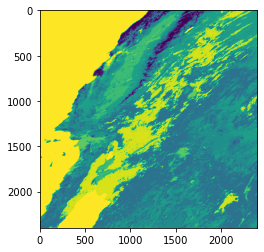

In [ ]:
plt.imshow(ds[0])

## reproject and crop

In [ ]:
for i in files:
    input_f = i
    filen = input_f.split('\\')[-1][:-4]+'_LU_rep'
    output_f = c_dir(output_dir, filen, 'tif')
    print('Processing ', output_f)
    subprocess.call(f'''gdalwarp HDF4_EOS:EOS_GRID:"'''+input_f+'''":MCD12Q1:LC_Prop2 '''+ str(output_f)+ ' -t_srs EPSG:32611')

Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2013001.h08v05.006.2018146012611_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2014001.h08v05.006.2018146015518_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2015001.h08v05.006.2018146022554_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2016001.h08v05.006.2018149124823_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2017001.h08v05.006.2019196133708_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2018001.h08v05.006.2019199224724_LU_rep.tif
Processing  d:\msda\data298\modis\mcd12\MCD12Q1.A2019001.h08v05.006.2020212125659_LU_rep.tif


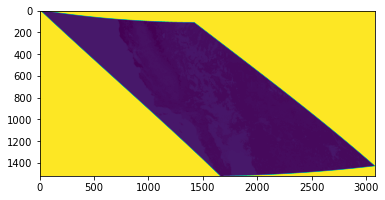

In [ ]:
ds = rasterio.open(output_f).read()[0]
plt.imshow(ds)

In [ ]:
mcd12 = r'd:\msda\data298\modis\mcd12'
output_dir = 'd:\msda\data298\modis\mcd12\cropped'
files = glob.glob(mcd12+'\*.tif')
files

In [ ]:
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import shapely
shapely.speedups.disable()
input_shape = r"D:\MSDA\data298\Shapefiles\SaltonSea_l.shp" 
crop_extent = gpd.read_file(input_shape)

for input_f in files:
    # output dir
    output_c_file_n = input_f.split('\\')[-1][:-4]+'_cropped'
    output_c_f_dir = c_dir(output_dir, output_c_file_n , 'tif')
    lidar_chm_im = rxr.open_rasterio(input_f, masked=True).squeeze()
    lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping), crop_extent.crs)
    lidar_clipped.rio.to_raster(output_c_f_dir)
    print(output_c_file_n + ' Succeed')

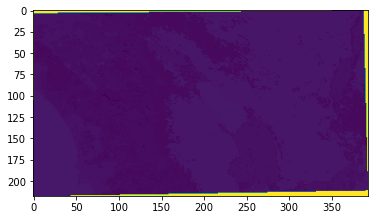

In [ ]:
ds = rasterio.open(output_c_f_dir).read()[0]
plt.imshow(ds)

## get values

In [ ]:
dfpm10['LU'] = ''
dfpm10

,Latitude,Longitude,Date Local,DailyPM10,PeriodPM10,year,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp,aod047,aod055,LU
0,32.97833,-115.53917,20130102,16.125000,4.0,2013,1,2,148.890000,121.256667,988.842857,987.585714,59.963636,52.023636,21.000000,27.801250,49,,
1,32.97833,-115.53917,20130103,20.500000,33.0,2013,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.312500,24.890000,329,300,
2,32.97833,-115.53917,20130104,27.750000,10.5,2013,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.312500,33.460000,112,82,
3,32.97833,-115.53917,20130105,30.541667,17.0,2013,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.125000,39.052500,93,68,
4,32.97833,-115.53917,20130106,22.875000,13.5,2013,1,6,86.933333,113.923333,988.535714,986.577143,57.036364,48.817273,50.000000,61.758750,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19136,33.67649,-117.33098,20191219,18.318182,0.0,2019,12,19,118.637857,107.039286,984.666667,984.541667,59.557143,50.610714,23.136364,34.264545,53,39,
19137,33.67649,-117.33098,20191220,12.666667,6.5,2019,12,20,72.770714,94.240714,989.333333,988.186667,65.985714,55.056429,17.545455,29.946364,-3276,-3305,
19138,33.67649,-117.33098,20191227,7.041667,3.5,2019,12,27,124.998571,119.534286,978.416667,978.103333,54.835714,49.280000,50.045455,61.281818,,,
19139,33.67649,-117.33098,20191228,11.083333,5.5,2019,12,28,111.300714,108.211429,983.500000,983.085000,54.921429,47.722143,45.136364,63.694545,140,103,


In [ ]:
df = rasterio.open('d:\\msda\\data298\\modis\\mcd12\\cropped\\MCD12Q1.A2013001.h08v05.006.2018146012611_LU_rep_cropped.tif')

In [ ]:
img_dir = glob.glob('d:\msda\data298\modis\mcd12\cropped'+'\*A'+str(year)+'*.tif')
df = rasterio.open(str(img_dir[0]))
df.read()[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 17,  17,  17, ..., 255, 255, 255],
       [ 17,  17,  17, ..., 255, 255, 255],
       [ 17,  17,  17, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
df

,Latitude,Longitude,year
0,33.447867,-117.088649,2013
1,33.944713,-116.830074,2013
2,32.676180,-115.483070,2014
3,33.447867,-117.088649,2014
4,33.944713,-116.830074,2014
5,32.676180,-115.483070,2015
6,33.447867,-117.088649,2015
7,33.944713,-116.830074,2015
8,33.447867,-117.088649,2016
9,33.944713,-116.830074,2016


In [ ]:
df.loc[df['year']==2013, ['Latitude']] = 0
df

,Latitude,Longitude,year
0,0.000000,-117.088649,2013
1,0.000000,-116.830074,2013
2,32.676180,-115.483070,2014
3,33.447867,-117.088649,2014
4,33.944713,-116.830074,2014
5,32.676180,-115.483070,2015
6,33.447867,-117.088649,2015
7,33.944713,-116.830074,2015
8,33.447867,-117.088649,2016
9,33.944713,-116.830074,2016


In [ ]:
dfpm10['LU'] = ''
dftmp = dfpm10[['Latitude', 'Longitude', 'year']]
df = dftmp.drop_duplicates(ignore_index=True)
for i in range(len(df)):
    year = df['year'][i]
    long = df['Longitude'][i]
    lat = df['Latitude'][i]
    img_dir = glob.glob('d:\msda\data298\modis\mcd12\cropped'+'\*A'+str(year)+'*.tif')
    ds = rasterio.open(img_dir[0])
    T0 = ds.transform
    p1 = Proj(ds.crs)
    r = ds.read()[0] # so the shape will be [row, col], not [1, row, col]
    cols, rows = np.meshgrid(np.arange(ndvi.shape[2]), np.arange(ndvi.shape[1]))
    T1 = T0 * Affine.translation(0.5, 0.5)
    rc2en = lambda r, c: (c, r) * T1
    eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)
    p2 = Proj(proj='latlong',datum='WGS84')
    longs, lats = transform(p1, p2, eastings, northings)
    #print(r.shape, lats.shape, longs.shape)

    lat_precision = 0.08
    lon_precision = 0.005
    try:

        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    except:
        lat_precision += 0.02
        lon_precision += 0.005
        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    print(lat, long, row, col)
    #print(lats[row, col], longs[row, long])
    lu = r[row, col]
    print(lu)
    dfpm10.loc[(dfpm10['year']==year)&(dfpm10['Latitude']==lat),['LU']] = lu
    print(i)
    


In [ ]:
dfpm25['LU'] = ''
dfpm25
dftmp = dfpm25[['Latitude', 'Longitude', 'year']]
df = dftmp.drop_duplicates(ignore_index=True)
for i in range(len(df)):
    year = df['year'][i]
    long = df['Longitude'][i]
    lat = df['Latitude'][i]
    img_dir = glob.glob('d:\msda\data298\modis\mcd12\cropped'+'\*A'+str(year)+'*.tif')
    ds = rasterio.open(img_dir[0])
    T0 = ds.transform
    p1 = Proj(ds.crs)
    r = ds.read()[0] # so the shape will be [row, col], not [1, row, col]
    cols, rows = np.meshgrid(np.arange(ndvi.shape[2]), np.arange(ndvi.shape[1]))
    T1 = T0 * Affine.translation(0.5, 0.5)
    rc2en = lambda r, c: (c, r) * T1
    eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)
    p2 = Proj(proj='latlong',datum='WGS84')
    longs, lats = transform(p1, p2, eastings, northings)
    #print(r.shape, lats.shape, longs.shape)

    lat_precision = 0.08
    lon_precision = 0.005
    try:

        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    except:
        lat_precision += 0.02
        lon_precision += 0.005
        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    #print(lat, long, row, col)
    #print(lats[row, col], longs[row, long])
    lu = r[row, col]
    print(lu)
    dfpm25.loc[(dfpm25['year']==year)&(dfpm25['Latitude']==lat), ['LU']] = lu
    print(i)

In [ ]:
dfpm10

,Latitude,Longitude,Date Local,DailyPM10,PeriodPM10,year,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp,aod047,aod055,LU
0,32.97833,-115.53917,20130102,16.125000,4.0,2013,1,2,148.890000,121.256667,988.842857,987.585714,59.963636,52.023636,21.000000,27.801250,49,,12
1,32.97833,-115.53917,20130103,20.500000,33.0,2013,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.312500,24.890000,329,300,12
2,32.97833,-115.53917,20130104,27.750000,10.5,2013,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.312500,33.460000,112,82,12
3,32.97833,-115.53917,20130105,30.541667,17.0,2013,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.125000,39.052500,93,68,12
4,32.97833,-115.53917,20130106,22.875000,13.5,2013,1,6,86.933333,113.923333,988.535714,986.577143,57.036364,48.817273,50.000000,61.758750,,,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19136,33.67649,-117.33098,20191219,18.318182,0.0,2019,12,19,118.637857,107.039286,984.666667,984.541667,59.557143,50.610714,23.136364,34.264545,53,39,10
19137,33.67649,-117.33098,20191220,12.666667,6.5,2019,12,20,72.770714,94.240714,989.333333,988.186667,65.985714,55.056429,17.545455,29.946364,-3276,-3305,10
19138,33.67649,-117.33098,20191227,7.041667,3.5,2019,12,27,124.998571,119.534286,978.416667,978.103333,54.835714,49.280000,50.045455,61.281818,,,10
19139,33.67649,-117.33098,20191228,11.083333,5.5,2019,12,28,111.300714,108.211429,983.500000,983.085000,54.921429,47.722143,45.136364,63.694545,140,103,10


# MODIS - MOD13Q1 - NDVI

## read the file & reproject & convert into tif 

In [ ]:
from osgeo import gdal, osr

import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import rasterio
import subprocess


In [ ]:
def c_dir(bdir, filename, format_f):
    f = '.'.join([filename, format_f])
    return os.path.join(bdir, f)

In [ ]:
m13dir = r'C:\Users\xurui\Downloads'
#r'C:\Users\xurui\Downloads'
output_dir = 'd:\msda\data298\modis\mod13'

In [ ]:
files = glob.glob(m13dir+'\*.hdf')
input_f = files[0]

In [ ]:
filen11 = input_f.split('\\')[-1][:-4]+'_NDVI_rep'


output_f11 = c_dir(output_dir, filen11, 'tif')
print(output_f11)

d:\msda\data298\modis\mod13\MOD13Q1.A2020353.h08v05.061.2021012023846_NDVI_rep.tif


In [ ]:
# this one works

subprocess.call(f'''gdalwarp HDF4_EOS:EOS_GRID:"'''+input_f+'''":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI" '''+ str(output_f11)+ ' -t_srs EPSG:32611')


0

In [ ]:
m13dir = r'C:\Users\xurui\Downloads'
output_dir = 'd:\msda\data298\modis\mod13'
files = glob.glob(m13dir+'\*.hdf')

for i in files:
    input_f = i
    filen = input_f.split('\\')[-1][:-4]+'_NDVI_rep'
    output_f = c_dir(output_dir, filen, 'tif')
    print('Processing ', output_f)
    subprocess.call(f'''gdalwarp HDF4_EOS:EOS_GRID:"'''+input_f+'''":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI" '''+ str(output_f)+ ' -t_srs EPSG:32611')



### read the hdf file

#### pyhdf

In [ ]:
from pyhdf.SD import SD

file = SD(files[0])

info=file.info()#数据集个数

print(info)

ds_dict=file.datasets()#所有数据集名称

for idx, sds in enumerate(ds_dict.keys()):

    print(idx, sds)
list(ds_dict.keys())[0]

(12, 6)
0 250m 16 days NDVI
1 250m 16 days EVI
2 250m 16 days VI Quality
3 250m 16 days red reflectance
4 250m 16 days NIR reflectance
5 250m 16 days blue reflectance
6 250m 16 days MIR reflectance
7 250m 16 days view zenith angle
8 250m 16 days sun zenith angle
9 250m 16 days relative azimuth angle
10 250m 16 days composite day of the year
11 250m 16 days pixel reliability


'250m 16 days NDVI'

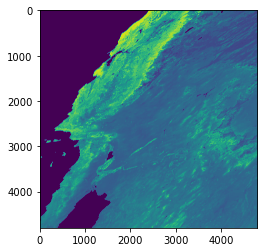

In [ ]:
ndvi = file.select(list(ds_dict.keys())[0]).get()

plt.imshow(ndvi)


#### gdal

In [ ]:
dataset = gdal.Open(files[0])
datasets_meta = dataset.GetMetadata("SUBDATASETS")
datasets_meta

{'SUBDATASET_1_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI"',
 'SUBDATASET_1_DESC': '[4800x4800] 250m 16 days NDVI MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)',
 'SUBDATASET_2_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days EVI"',
 'SUBDATASET_2_DESC': '[4800x4800] 250m 16 days EVI MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)',
 'SUBDATASET_3_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days VI Quality"',
 'SUBDATASET_3_DESC': '[4800x4800] 250m 16 days VI Quality MODIS_Grid_16DAY_250m_500m_VI (16-bit unsigned integer)',
 'SUBDATASET_4_NAME': 'HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days red

('HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI"', '[4800x4800] 250m 16 days NDVI MODIS_Grid_16DAY_250m_500m_VI (16-bit integer)')


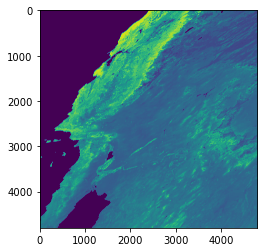

In [ ]:
inds = gdal.Open(files[0])
gt = inds.GetGeoTransform()
datasets = inds.GetSubDatasets()
print(datasets[0])
ndvi = gdal.Open(datasets[0][0]).ReadAsArray()
#gdal.Warp(output_tif, datasets[0], dstSRS = 'EPSG:4326')
plt.imshow(ndvi[:,:])

#### rasterio

In [ ]:
file = rasterio.open('HDF4_EOS:EOS_GRID:"C:\\Users\\xurui\\Downloads\\MOD13Q1.A2012353.h08v05.006.2018226105753.hdf":MODIS_Grid_16DAY_250m_500m_VI:"250m 16 days NDVI"').read()

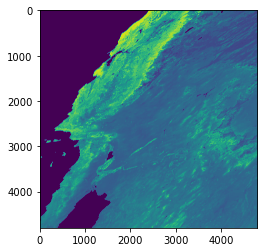

In [ ]:
plt.imshow(file[0,:,:])

## crop

Try1: https://zhuanlan.zhihu.com/p/157280273 - it is mask... how to get only the window not all the image with a mask...

Try2: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/ - good

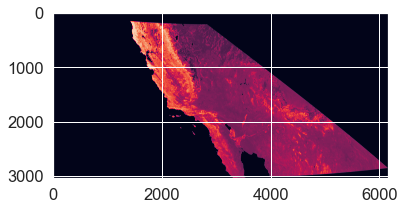

In [ ]:
from osgeo import gdal
input_shape = r"D:\MSDA\data298\Shapefiles\SaltonSea_l.shp" 
tif_files = glob.glob(output_dir+'\*.tif')

input_f = tif_files[1]

output_c_tif = output_dir+'\cropped'
output_c_file_n = input_f.split('\\')[-1][:-4]+'_cropped'
output_c_f_dir = c_dir(output_c_tif, output_c_file_n , 'tif')

input_raster=gdal.Open(input_f)

plt.imshow(input_raster.ReadAsArray())

In [ ]:
input_raster.ReadAsArray()

array([[-3000, -3000, -3000, ...,   -62,  -147,  -153],
       [-3000, -3000, -3000, ...,  -219,  -216,  -199],
       [-3000, -3000, -3000, ...,  -216,  -211,  -211],
       ...,
       [ 2378,  2380,  2361, ...,  1917,  1931,  1939],
       [ 2251,  2327,  2279, ...,  1981,  2006,  2049],
       [ 2395,  2363,  2264, ...,  2110,  2080,  2180]], dtype=int16)

In [ ]:
# try 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

# Get data and set working directory
et.data.get_data("colorado-flood")


'C:\\Users\\xurui\\earth-analytics\\data\\colorado-flood\\.'

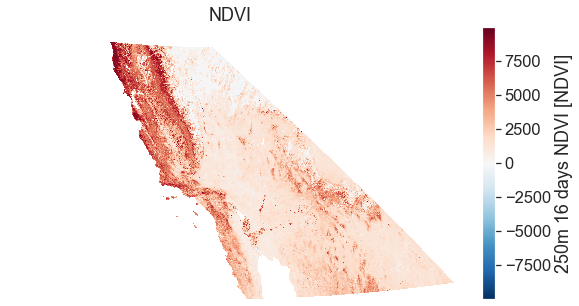

In [ ]:

lidar_chm_im = rxr.open_rasterio(input_f, masked=True).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="NDVI")

ax.set_axis_off()
plt.show()

In [ ]:
aoi = r"D:\MSDA\data298\Shapefiles\SaltonSea_l.shp" 
# Open crop extent (your study area extent boundary)
import shapely
shapely.speedups.disable()
crop_extent = geopandas.read_file(aoi)

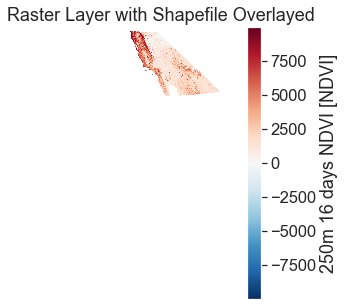

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)
crop_extent.plot(ax=ax,alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")
ax.set_axis_off()
plt.show()

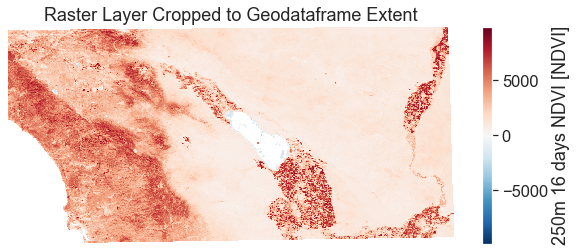

In [ ]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [ ]:
lidar_clipped.rio.to_raster(output_c_f_dir)

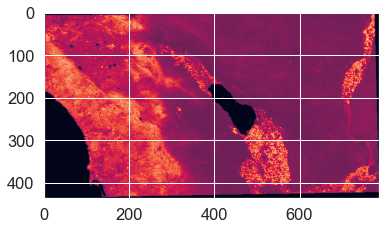

In [ ]:
ds = rasterio.open(output_c_f_dir).read()
plt.imshow(ds[0])

##### clip all

In [ ]:
from osgeo import gdal
import shapely
shapely.speedups.disable()
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep


# shapefile
input_shape = r"D:\MSDA\data298\Shapefiles\SaltonSea_l.shp" 
crop_extent = geopandas.read_file(input_shape)
# input files
tif_files = glob.glob(output_dir+'\*.tif')
# output
output_dir = output_dir+'\cropped'


In [ ]:
for input_f in tif_files:
    # output dir
    output_c_file_n = input_f.split('\\')[-1][:-4]+'_cropped'
    output_c_f_dir = c_dir(output_c_tif, output_c_file_n , 'tif')
    lidar_chm_im = rxr.open_rasterio(input_f, masked=True).squeeze()
    lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping), crop_extent.crs)
    lidar_clipped.rio.to_raster(output_c_f_dir)
    print(output_c_file_n + ' Succeed')


In [ ]:
aod = r'D:\MSDA\data298\MODIS\ALL_AOD'
tif_files = glob.glob(aod+'\*.tif')
# output
output_dir = aod+'\cropped'
print(output_dir)

D:\MSDA\data298\MODIS\ALL_AOD\cropped


## get the values

### get lon*lat

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal, osr

import os
import glob
import geopandas as gpd

from affine import Affine
from pyproj import Proj, transform
import pyproj

In [ ]:
mod13_rep = r'd:\msda\data298\modis\mod13\cropped'
files = glob.glob(mod13_rep+'\*.tif')
input_f = files[1]

##### 1 - good
*https://stackoverflow.com/questions/2922532/obtain-latitude-and-longitude-from-a-geotiff-file*

In [ ]:
#input_f = r'D:\MSDA\data298\MODIS\ALL_AOD\Cropped\MCD19A2.A2013002.h08v05.006.2018066202838_047_cropped.tif'
ds = rasterio.open(input_f)
T0 = ds.transform
p1 = Proj(ds.crs)
ndvi = ds.read()
ndvi.shape

(1, 437, 787)

In [ ]:
# All rows and columns
cols, rows = np.meshgrid(np.arange(ndvi.shape[2]), np.arange(ndvi.shape[1]))

# Get affine transform for pixel centres
T1 = T0 * Affine.translation(0.5, 0.5)
# Function to convert pixel row/column index (from 0) to easting/northing at centre
rc2en = lambda r, c: (c, r) * T1

# All eastings and northings (there is probably a faster way to do this)
eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)

# Project all longitudes, latitudes
p2 = Proj(proj='latlong',datum='WGS84')
longs, lats = transform(p1, p2, eastings, northings)

<ipython-input-249-81d149909759>:7: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  rc2en = lambda r, c: (c, r) * T1
<ipython-input-249-81d149909759>:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longs, lats = transform(p1, p2, eastings, northings)


In [ ]:
print(T0)
print('======')
print(T1)
print('======')
print(p1, '\n',p2)


| 393.71, 0.00, 434103.59|
| 0.00,-393.71, 3776421.40|
| 0.00, 0.00, 1.00|
| 393.71, 0.00, 434300.45|
| 0.00,-393.71, 3776224.54|
| 0.00, 0.00, 1.00|
proj=utm zone=11 datum=WGS84 units=m no_defs ellps=WGS84 towgs84=0,0,0 
 proj=longlat datum=WGS84 no_defs ellps=WGS84 towgs84=0,0,0


In [ ]:
longs

array([[-117.71029352, -117.69321758, -117.67614155, ..., -114.3984356 ,
        -114.38138131, -114.36432732],
       [-117.71017482, -117.69310173, -117.67602856, ..., -114.39886982,
        -114.38181837, -114.36476722],
       [-117.71005619, -117.69298596, -117.67591564, ..., -114.39930375,
        -114.38225513, -114.36520682],
       ...,
       [-117.69816261, -117.68137825, -117.66459381, ..., -114.44281195,
        -114.42604777, -114.40928388],
       [-117.69805241, -117.6812707 , -117.66448891, ..., -114.44321508,
        -114.42645354, -114.40969229],
       [-117.69794229, -117.68116322, -117.66438408, ..., -114.44361793,
        -114.42685903, -114.41010041]])

In [ ]:
lats

array([[34.1195018 , 34.11959937, 34.11969457, ..., 34.09399694,
        34.09363438, 34.09326945],
       [34.10529987, 34.10539739, 34.10549254, ..., 34.07980854,
        34.07944617, 34.07908144],
       [34.0910979 , 34.09119537, 34.09129047, ..., 34.06562009,
        34.06525792, 34.06489338],
       ...,
       [32.61391324, 32.61400542, 32.61409535, ..., 32.58981852,
        32.589476  , 32.58913125],
       [32.59970782, 32.59979995, 32.59988983, ..., 32.57562618,
        32.57528385, 32.57493928],
       [32.58550237, 32.58559445, 32.58568428, ..., 32.56143381,
        32.56109166, 32.56074728]])

### get value according to the coordinate

In [ ]:
import pandas as pd
import numpy as np

pm10 = r'D:\MSDA\data298\MODIS\pm10_model.csv'
pm25 = r'D:\MSDA\data298\MODIS\pm25_model.csv'

df10 = pd.read_csv(pm10)
df10.head()

,Unnamed: 0,Site Num,Latitude,Longitude,Date Local,County Name,DailyPM10,PeriodPM10,aod055,aod047,...,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp
0,1,7,32.97833,-115.53917,20130102,Imperial,16.125000,4.0,57,78,...,1,2,148.890000,121.256667,988.842857,987.585714,59.963636,52.023636,21.0000,27.80125
1,2,7,32.97833,-115.53917,20130103,Imperial,20.500000,33.0,50,68,...,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.3125,24.89000
2,3,7,32.97833,-115.53917,20130104,Imperial,27.750000,10.5,83,112,...,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.3125,33.46000
3,4,7,32.97833,-115.53917,20130105,Imperial,30.541667,17.0,73,99,...,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.1250,39.05250
4,5,7,32.97833,-115.53917,20130106,Imperial,22.875000,13.5,145,195,...,1,6,86.933333,113.923333,988.535714,986.577143,57.036364,48.817273,50.0000,61.75875


In [ ]:
n = 2 # the # of record
lat_s = df10['Latitude'][n]
lon_s = df10['Longitude'][n]
#print(lat_s, lon_s)
lat_precision = 0.08
lon_precision = 0.005
lon_array = np.where((longs > lon_s-lon_precision) & (longs < lon_s+lon_precision))
lat_array = np.where((lats > lat_s-lat_precision) & (lats < lat_s+lat_precision))
row = int(np.mean([i for i in lon_array[0] if i in lat_array[0]]))
col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
print(row, col, ndvi[0, row, col])

321 512 2628


In [ ]:
n = 2 # the # of record
lat_s = df10['Latitude'][n]
lon_s = df10['Longitude'][n]
#print(lat_s, lon_s)
lat_precision = 0.1
lon_precision = 0.01
lon_array = np.where((longs > lon_s-lon_precision) & (longs < lon_s+lon_precision))
lat_array = np.where((lats > lat_s-lat_precision) & (lats < lat_s+lat_precision))
row = int(np.mean([i for i in lon_array[0] if i in lat_array[0]]))
col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
print(row, col, ndvi[0, row, col])

319 512 2761


In [ ]:
print(np.where((longs > lon_s-lon_precision) & (longs < lon_s+lon_precision)))
print(np.where((lats > lat_s-lat_precision) & (lats < lat_s+lat_precision)))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81], dtype=int64), array([127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128], dtype=int64))
(array([73, 73, 73, ..., 86, 86, 86], dtype=int64), array([194, 195, 196, ...,  77,  78,  79], dtype=int64))


In [ ]:
np.unique([i for i in lon_array[0] if i in lat_array[0]])

array([73, 74, 75, 76, 77, 78, 79, 80, 81], dtype=int64)

In [ ]:
np.unique([i for i in lon_array[1] if i in lat_array[1]])

array([127, 128], dtype=int64)

In [ ]:
lats[77, 127], longs[77, 127]

(33.01951792067837, -115.55993538340071)

In [ ]:
lat, long

(33.213611, -115.54528)

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal, osr

import os
import glob
import geopandas as gpd

from affine import Affine
from pyproj import Proj, transform

def get_value_from_img(img_dir, lat, long):
    # AUGS:
    # img_dir: path of GeoTiff file 
    # lat: latitude of the point
    # long: longitude of the point
    # OUTCOME: the value at this point

    ds = rasterio.open(img_dir)
    T0 = ds.transform
    p1 = Proj(ds.crs)
    r = ds.read()[0] # so the shape will be [row, col], not [1, row, col]
    cols, rows = np.meshgrid(np.arange(r.shape[2]), np.arange(r.shape[1]))
    T1 = T0 * Affine.translation(0.5, 0.5)
    rc2en = lambda r, c: (c, r) * T1
    eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)
    p2 = Proj(proj='latlong',datum='WGS84')
    longs, lats = transform(p1, p2, eastings, northings)
    #print(r.shape, lats.shape, longs.shape)

    lat_precision = 0.08
    lon_precision = 0.005
    try:

        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    except:
        lat_precision += 0.02
        lon_precision += 0.005
        lon_array = np.where((longs > long-lon_precision) & (longs < long+lon_precision))
        lat_array = np.where((lats > lat-lat_precision) & (lats < lat+lat_precision))
        row = int(np.mean([np.unique([i for i in lon_array[0] if i in lat_array[0]])]))
        col = int(np.mean(np.unique([i for i in lon_array[1] if i in lat_array[1]])))
    #print(lat, long, row, col)
    #print(lats[row, col], longs[row, long])
    return r[row, col]
def out_date(year,day):
    fir_day = datetime.datetime(year,1,1)
    zone = datetime.timedelta(days=day-1)
    return datetime.datetime.strftime(fir_day + zone, "%Y%m%d")
print (out_date(2016,221))

20160808


## table

In [ ]:
import datetime

In [ ]:
dfpm10 = pd.read_csv(r'D:\MSDA\data298\MODIS\pm10_model.csv')
dfpm10.head()

,Unnamed: 0,Site Num,Latitude,Longitude,Date Local,County Name,DailyPM10,PeriodPM10,aod055,aod047,...,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp
0,1,7,32.97833,-115.53917,20130102,Imperial,16.125000,4.0,57,78,...,1,2,148.890000,121.256667,988.842857,987.585714,59.963636,52.023636,21.0000,27.80125
1,2,7,32.97833,-115.53917,20130103,Imperial,20.500000,33.0,50,68,...,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.3125,24.89000
2,3,7,32.97833,-115.53917,20130104,Imperial,27.750000,10.5,83,112,...,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.3125,33.46000
3,4,7,32.97833,-115.53917,20130105,Imperial,30.541667,17.0,73,99,...,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.1250,39.05250
4,5,7,32.97833,-115.53917,20130106,Imperial,22.875000,13.5,145,195,...,1,6,86.933333,113.923333,988.535714,986.577143,57.036364,48.817273,50.0000,61.75875


In [ ]:
dfpm10.drop(columns=['Unnamed: 0', 'Site Num', 'County Name', 'aod055', 'aod047'], inplace=True)

In [ ]:
dfpm10['aod047'] = ''
dfpm10['aod055'] = ''

In [ ]:
dfpm25 = pd.read_csv(r'D:\MSDA\data298\MODIS\pm25_model.csv')
dfpm25.drop(columns=['Unnamed: 0', 'Site Num', 'County Name', 'aod055', 'aod047'], inplace=True)

In [ ]:
dfpm25['aod047'] = ''
dfpm25['aod055'] = ''

In [ ]:
dfpm25.head()

,Latitude,Longitude,Date Local,DailyPM25,PeriodPM25,year,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp,aod047,aod055
0,33.447867,-117.088649,20130102,3.217391,2.5,2013,1,2,148.890000,121.256667,988.842857,987.585714,59.963636,52.023636,21.0000,27.80125,,
1,33.447867,-117.088649,20130103,3.416667,6.0,2013,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.3125,24.89000,,
2,33.447867,-117.088649,20130104,4.291667,4.0,2013,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.3125,33.46000,,
3,33.447867,-117.088649,20130105,5.217391,6.5,2013,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.1250,39.05250,,
4,33.447867,-117.088649,20130108,4.833333,0.0,2013,1,8,141.383333,121.730000,988.014286,986.514286,69.854545,59.536364,28.0000,39.36750,,


In [ ]:
base_dir = r'D:\MSDA\data298\MODIS\ALL_AOD\Cropped'
f047 = glob.glob(base_dir+'\*_047_cropped.tif')
f055 = glob.glob(base_dir+'\*_055_cropped.tif')

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
for input_f in f055:
    f_d = input_f.split('.')[1][1:] # date of the img
    year = int(f_d[:4])
    df_tmp = dfpm25[dfpm25['Date Local']==int(out_date(year, int(f_d[4:])))]
    inds = df_tmp.index
    
    inds = df_tmp.index
    for i in inds:
        lat = dfpm25['Latitude'][i]
        long = dfpm25['Longitude'][i]
        dfpm25['aod055'][i] = get_value_from_img(input_f, lat, long)
    print(f_d)



In [ ]:
for input_f in f047:
    f_d = input_f.split('.')[1][1:] # date of the img
    year = int(f_d[:4])
    df_tmp = dfpm25[dfpm25['Date Local']==int(out_date(year, int(f_d[4:])))]
    inds = df_tmp.index
    
    inds = df_tmp.index
    for i in inds:
        lat = dfpm25['Latitude'][i]
        long = dfpm25['Longitude'][i]
        dfpm25['aod047'][i] = get_value_from_img(input_f, lat, long)
    print(f_d)

In [ ]:
# try remove the nans
dfpm10_tmp = dfpm10[dfpm10['aod055']!='']
dfpm10_tmp['aod047'] = [int(i) for i in dfpm10_tmp.aod047]
dfpm10_tmp['aod055'] = [int(i) for i in dfpm10_tmp.aod055]

dfpm25_tmp = dfpm25[dfpm25['aod055']!='']
dfpm25_tmp['aod047'] = [int(i) for i in dfpm25_tmp.aod047]
dfpm25_tmp['aod055'] = [int(i) for i in dfpm25_tmp.aod055]

dfpm25_tmp

,Latitude,Longitude,Date Local,DailyPM25,PeriodPM25,year,month,day,Pwind,Dwind,Ppress,Dpress,Pt,Dt,Pdp,Ddp,aod047,aod055,LU
1,33.447867,-117.088649,20130103,3.416667,6.0,2013,1,3,15.336667,82.956667,990.464286,988.677143,62.518182,52.980909,16.312500,24.890000,38,28,10
2,33.447867,-117.088649,20130104,4.291667,4.0,2013,1,4,130.076667,115.000000,855.442857,991.442857,54.627273,47.860909,16.312500,33.460000,76,56,10
3,33.447867,-117.088649,20130105,5.217391,6.5,2013,1,5,102.000000,109.426667,994.607143,991.900000,58.836364,47.535455,23.125000,39.052500,34,25,10
4,33.447867,-117.088649,20130108,4.833333,0.0,2013,1,8,141.383333,121.730000,988.014286,986.514286,69.854545,59.536364,28.000000,39.367500,59,45,10
5,33.447867,-117.088649,20130111,3.500000,3.0,2013,1,11,122.433333,117.680000,988.007143,985.622857,51.350000,44.710909,35.687500,46.301250,80,59,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,33.944713,-116.830074,20191217,1.565217,2.0,2019,12,17,85.261429,93.636429,991.333333,989.875000,58.367857,51.244286,13.363636,20.923636,-20992,-21000,10
4558,33.944713,-116.830074,20191219,2.304348,1.0,2019,12,19,118.637857,107.039286,984.666667,984.541667,59.557143,50.610714,23.136364,34.264545,46,34,10
4559,33.944713,-116.830074,20191220,0.526316,0.5,2019,12,20,72.770714,94.240714,989.333333,988.186667,65.985714,55.056429,17.545455,29.946364,55,40,10
4560,33.944713,-116.830074,20191228,4.708333,5.5,2019,12,28,111.300714,108.211429,983.500000,983.085000,54.921429,47.722143,45.136364,63.694545,-8928,-8949,10


#### modeling - pm2.5

In [ ]:
dfpm25_tmp = dfpm25[(dfpm25['aod055']!='')&(dfpm25['LU']!='')]
dfpm25_tmp['aod047'] = [int(i) for i in dfpm25_tmp.aod047]
dfpm25_tmp['aod055'] = [int(i) for i in dfpm25_tmp.aod055]

(2608, 16) (652, 16)


Text(0.5, 1.0, 'R2 score:  0.4463096702933558')

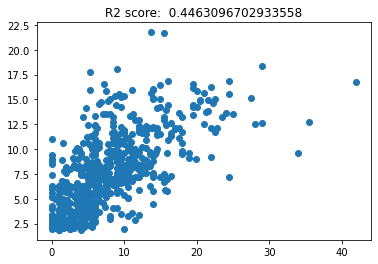

In [ ]:
X = dfpm25_tmp.drop(columns=['Date Local', 'DailyPM25', 'PeriodPM25'])
y = dfpm25_tmp['PeriodPM25']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)
print(X_train.shape, X_test.shape)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
reg = MLPRegressor(hidden_layer_sizes=(1024,128,64,32,8),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
plt.scatter(y_test, y_pred)
plt.title(f'R2 score:  {r2_score(y_test, y_pred)}')

Coefficients:  [  -1.21591166   -0.98497661   -1.35600246   -0.44707465   -0.2787012
   -0.31728703   -0.2902842     0.18405709   -0.57719792   -2.58858655
    3.97472784    1.24577801    0.18964674  127.14800129 -127.09007265
    0.45202807]
Variance score: 0.33272151023796914


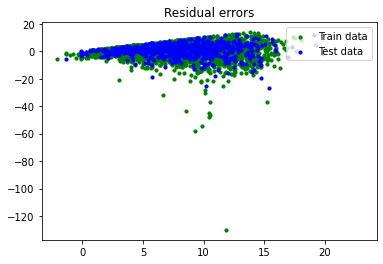

Text(0, 0.5, 'Pred')

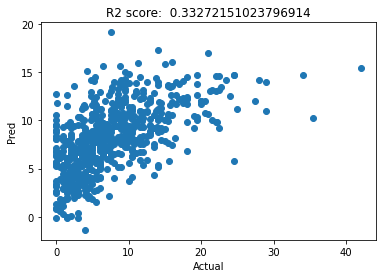

In [ ]:
# pm2.5
from sklearn import datasets, linear_model, metrics

reg = linear_model.LinearRegression()
reg.fit(X_trainscaled, y_train)
print('Coefficients: ', reg.coef_)# regression coefficients
print('Variance score: {}'.format(reg.score(X_testscaled, y_test)))# variance score: 1 means perfect prediction
## plotting residual errors in training data
plt.scatter(reg.predict(X_trainscaled), reg.predict(X_trainscaled) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(reg.predict(X_testscaled), reg.predict(X_testscaled) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting legend
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual errors")
## method call for showing the plot
plt.show()
plt.scatter(y_test, reg.predict(X_testscaled))
plt.title(f'R2 score:  {r2_score(y_test, reg.predict(X_testscaled))}')
plt.xlabel('Actual')
plt.ylabel('Pred')

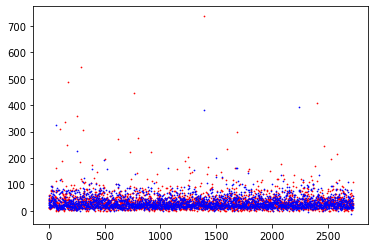

In [ ]:
plt.scatter( range(len(y_test)), y_test,color = 'r', s = 0.5)
plt.scatter(range(len(y_test)), reg.predict(X_testscaled), color = 'b', s = 0.5)


#### modeling-pm10

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

(10880, 16) (2720, 16)


Text(0.5, 1.0, 'R2 score:  0.37756795963926715')

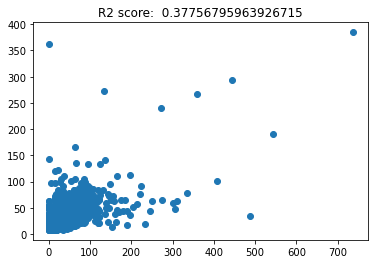

In [ ]:
X = dfpm10_tmp.drop(columns=['Date Local', 'DailyPM10', 'PeriodPM10'])
y = dfpm10_tmp['PeriodPM10']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)
print(X_train.shape, X_test.shape)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
reg = MLPRegressor(hidden_layer_sizes=(2048,128,64,32,8),activation="relu" ,random_state=1, max_iter=50).fit(X_trainscaled, y_train)
y_pred=reg.predict(X_testscaled)
plt.scatter(y_test, y_pred)
plt.title(f'R2 score:  {r2_score(y_test, y_pred)}')

Text(0.5, 1.0, 'Residual errors - pm10')

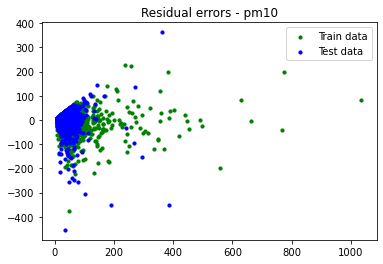

In [ ]:
## plotting residual errors in training data
plt.scatter(reg.predict(X_trainscaled), reg.predict(X_trainscaled) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(reg.predict(X_testscaled), reg.predict(X_testscaled) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual errors - pm10")

In [ ]:
X_trainscaled.shape

(10880, 16)

In [ ]:
del input_f

In [ ]:
X_trainscaled = np.append(X_trainscaled, np.ones([10880,1]),1)
X_testscaled = np.append(X_testscaled, np.ones([2720,1]),1)

X_trainscaled.shape

(10880, 17)

Coefficients:  [ -4.15864046  -3.29948625  -2.80288078   2.99000087   0.05326477
   0.63765716  -1.56017518   2.42630364  -1.68050232 -37.57534711
  41.79898191  -4.89570486   0.70848321 -10.4127893    9.62128146
  -1.55910885]
Variance score: 0.0493787801099147


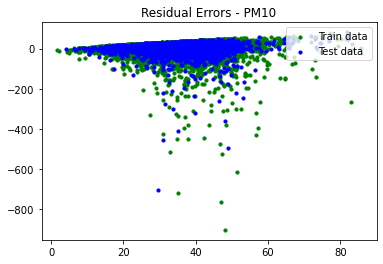

Text(0, 0.5, 'Pred')

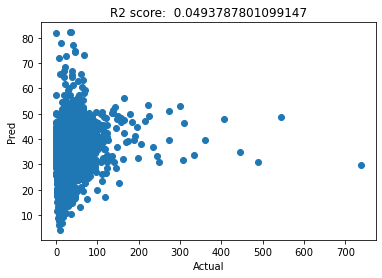

In [ ]:
# pm10 LR
from sklearn import datasets, linear_model, metrics

reg = linear_model.LinearRegression()
reg.fit(X_trainscaled, y_train)
print('Coefficients: ', reg.coef_)# regression coefficients
print('Variance score: {}'.format(reg.score(X_testscaled, y_test)))# variance score: 1 means perfect prediction
## plotting residual errors in training data
plt.scatter(reg.predict(X_trainscaled), reg.predict(X_trainscaled) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(reg.predict(X_testscaled), reg.predict(X_testscaled) - y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting legend
plt.legend(loc = 'upper right')
## plot title
plt.title("Residual Errors - PM10")
## method call for showing the plot
plt.show()
plt.scatter(y_test, reg.predict(X_testscaled))
plt.title(f'R2 score:  {r2_score(y_test, reg.predict(X_testscaled))}')
plt.xlabel('Actual')
plt.ylabel('Pred')

#### modeling-dnn

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
len(X.columns)

15

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              16384     
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 1,656,817
Trainable params: 1,656,817
Non-trainable params: 0
____________________________________________

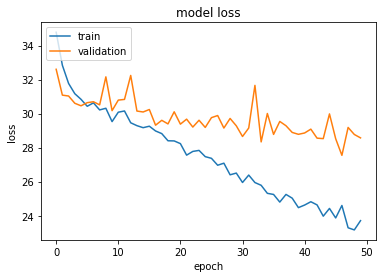

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["mse"])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['rmse'])
model.summary()

history = model.fit(X_trainscaled, y_train, epochs=50, batch_size=64,  verbose=1, validation_split=0.2)
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'R2 score:  0.264428487105122')

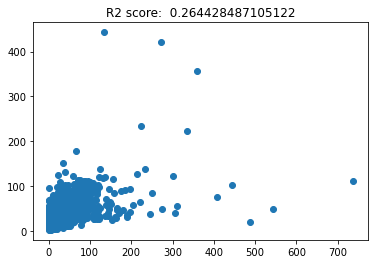

In [ ]:
y_pred=model.predict(X_testscaled)
plt.scatter(y_test, y_pred)
plt.title(f'R2 score:  {r2_score(y_test, y_pred)}')

# MODIS for PM2.5 & PM10

NASA's training
* about air quality: https://appliedsciences.nasa.gov/join-mission/training/english/arset-inside-look-how-nasa-measures-air-pollution


> learn which pollutants can be measured from space, how satellites make these measurements, the do’s and don’ts in interpreting satellite data, and how to download and create your own visualizations. 

 

* about air quality and health: https://appliedsciences.nasa.gov/join-mission/training/english/arset-applications-satellite-observations-air-quality-and-health

> air quality monitoring, forecasting, smoke, fire, PM2.5 monitoring, image  interpretation, and data access for modeling efforts


* about air quality: https://appliedsciences.nasa.gov/join-mission/training/english/arset-satellite-remote-sensing-air-quality

>  identify, track, and measure air quality events of their choosing.

* about modis and viirs: https://appliedsciences.nasa.gov/join-mission/training/english/arset-modis-viirs-transition-air-quality-applications

> VIIRS resolution: 6km, every 6min

* about dust, PM: https://appliedsciences.nasa.gov/join-mission/training/english/arset-satellite-remote-sensing-dust-fires-smoke-and-air-quality


Python Code of satellite image to PM2.5: https://appliedsciences.nasa.gov/join-mission/training/english/arset-data-analysis-tools-high-resolution-air-quality-satellite 


#### Get in-situ data

Mark: the time of satellite data capture are UTC time. local time is PST time.
 Most of the data are captured during 17:00 to 20:00 p.m. So, select this time period to get the in-situ data. 

 Question: some values are negative. Maybe measurement error or the concentration is low for the equipment cannot measure. So, make the negative values as zeros...

In [ ]:
from zipfile import ZipFile
import pandas as pd
#from statistics import mean
datadir = 'd:\msda\data298'
outputdir = 'd:\msda\data298'


In [ ]:
df10 = pd.read_csv(datadir+'\modis\_81102.csv')
df10.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)
df10 = df10[df10['Sample Measurement']>-0.0001]
df2 = pd.read_csv(datadir+'\modis\_88101.csv')
df2.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)
df2 = df2[df2['Sample Measurement']>-0.0001]
df2

In [ ]:
dfw = pd.read_csv(datadir+'\modis\_WIND.csv')
dfw.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)
dfw = dfw[dfw['Sample Measurement']>-0.0001]
dft = pd.read_csv(datadir+'\modis\_TEMP.csv')
dft.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)
dfp = pd.read_csv(datadir+'\modis\_PRESS.csv')
dfp.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)
dfr = pd.read_csv(datadir+'\modis\_RH_DP.csv')
dfr.drop(columns = ['Datum', 'POC', 'Unnamed: 0'], inplace = True)

In [ ]:
temp_df = df10.drop(columns=['Parameter Code','Parameter Name',
       'Time Local', 'Date GMT', 'Time GMT',
       'Sample Measurement'])
temp_df.drop_duplicates(inplace = True)
temp_df
df10m = temp_df
df10m['DailyPM10'] = 0
df10m['PeriodPM10'] = 0

df10m['wind'] = 0
df10m['temp'] = 0
df10m['press'] = 0
df10m['rhdp'] = 0

In [ ]:
df10m.head()

In [ ]:
def mean(num):
    m = 0
    try:
        m = sum(num)/len(num)
        print(m, end=' ')

    except:
        pass
    return round(m,2)

def get_m_d():
    site_l = df10['Site Num'].unique()
    date_l = df10['Date Local'].unique()
    n= 0
    daily = []
    period = []
    for n in range(len(df10m)):
        print(n)
        #print(df10[(df10['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])])
        df10m.iloc[n, 5] = mean(df10[(df10['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#daily mean
        df10m.iloc[n, 6] = mean(df10[(df10['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])&(df10['Time GMT']< '20:00')&(df10['Time GMT']>'17:00')&(df10['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#period

        df10m.iloc[n, 7] = mean(dfw[(dfw['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])&(dfw['Time GMT']< '20:00')&(dfw['Time GMT']>'17:00')&(dfw['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#period
        df10m.iloc[n, 8] = mean(dft[(dft['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])&(dft['Time GMT']< '20:00')&(dft['Time GMT']>'17:00')&(dft['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#period
        df10m.iloc[n, 9] = mean(dfp[(dfp['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])&(dfp['Time GMT']< '20:00')&(dfp['Time GMT']>'17:00')&(dfp['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#period
        df10m.iloc[n, 10] = mean(dfr[(dfr['Date Local'] == df10m.iloc[n, 3] )&(df10['Site Num']==df10m.iloc[n, 0])&(dfr['Time GMT']< '20:00')&(dfr['Time GMT']>'17:00')&(dfr['Site Num']==df10m.iloc[n, 0])]['Sample Measurement'])#period
get_m_d()
df10m

In [ ]:
temp_df = df2.drop(columns=['Parameter Code','Parameter Name',
       'Time Local', 'Date GMT', 'Time GMT',
       'Sample Measurement'])
temp_df.drop_duplicates(inplace = True)
temp_df
df2m = temp_df
df2m['DailyPM25'] = 0
df2m['PeriodPM25'] = 0
df2m

In [ ]:
def get_m_d2():
    site_l = df2['Site Num'].unique()
    date_l = df2['Date Local'].unique()
    n= 0
    daily = []
    period = []
    for n in range(len(df2m)):
        print(n)
        df2m.iloc[n, 5] = mean(df2[(df2['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#daily mean
        df2m.iloc[n, 6] = mean(df2[(df2['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])&(df2['Time GMT']< '20:00')&(df2['Time GMT']>'17:00')&(df2['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#period

        df2m.iloc[n, 9] = mean(dfw[(dfw['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])&(dfw['Time GMT']< '20:00')&(dfw['Time GMT']>'17:00')&(dfw['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#period
        df2m.iloc[n, 10] = mean(dft[(dft['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])&(dft['Time GMT']< '20:00')&(dft['Time GMT']>'17:00')&(dft['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#period
        df2m.iloc[n, 11] = mean(dfp[(dfp['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])&(dfp['Time GMT']< '20:00')&(dfp['Time GMT']>'17:00')&(dfp['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#period
        df2m.iloc[n, 12] = mean(dfr[(dfr['Date Local'] == df2m.iloc[n, 3] )&(df2['Site Num']==df2m.iloc[n, 0])&(dfr['Time GMT']< '20:00')&(dfr['Time GMT']>'17:00')&(dfr['Site Num']==df2m.iloc[n, 0])]['Sample Measurement'])#period

get_m_d2()
df2m

#### AOD
refer to: https://github.com/samsammurphy/6S_emulator

Read hdf, refer to: https://moonbooks.org/Articles/How-to-read-a-MODIS-HDF-file-using-python-/

MCD19A2 guide, refer to: http://hdfeos.org/zoo/MORE/LPDAAC/MCD/MCD19A2.A2010010.h25v06.006.2018047103710.hdf.py 

###### Three ways to open MODIS data (hdf file)

rasterio

pyhdf

gdal


In [ ]:
import rasterio
from pyhdf.SD import SD, SDC
from osgeo import gdal

In [ ]:
src = rasterio.open('HDF4_EOS:EOS_GRID:"d:\\msda\\data298\\modis\\MCD19A2.A2013001.h08v05.006.2018066202837.hdf":grid1km:Optical_Depth_047') # 
plt.imshow(src.read()[0])

In [ ]:
type(src)

In [ ]:
inds = gdal.Open(file_name)
gt = inds.GetGeoTransform()
datasets = inds.GetSubDatasets()
print(datasets[0])
aod047 = gdal.Open(datasets[0][0]).ReadAsArray()
#gdal.Warp(output_tif, datasets[0], dstSRS = 'EPSG:4326')
plt.imshow(aod047[0,:,:])

In [ ]:
type(aod047)

In [ ]:
aod047 = gdal.Open(datasets[0][0]).ReadAsArray()


plt.imshow(np.max(aod047, axis=0))

https://zhuanlan.zhihu.com/p/366231057 to tiff
http://www.cxyzjd.com/article/kymgoal/112150360

http://www.cxyzjd.com/article/qq_27045589/81062586 gdal.warp


In [ ]:
gdal.Warp('test.tif', datasets[0][0], dstSRS = 'EPSG:4326')

In [ ]:
gdal.Warp('test1.tif', datasets[0][0], format='GTiff', tps=True, xRes=0.05, yRes=0.05, dstNodata=65535, srcNodata=65535, resampleAlg=gdal.GRIORA_NearestNeighbour, outputType=gdal.GDT_Int32, dstSRS = 'EPSG:4326')

###### show basic info

for each aod data 

In [ ]:
from pyhdf.SD import SD, SDC
import os 
import glob
import pprint
from osgeo import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pyproj
import rasterio
base_dir = 'd:\msda\data298\modis'
hdf_add = glob.glob(base_dir +'\*.hdf')
hdfs = [i.split('\\')[-1] for i in hdf_add]

In [ ]:
file_name = hdf_add[0]
file = SD(file_name, SDC.READ)
datasets_dic = file.datasets()
# Scientific Datasets (SDS)
'''for idx,sds in enumerate(datasets_dic.keys()):
    # print (idx,sds)
    sds_obj = file.select(sds)
    print(sds, '\n','===='*10)
    pprint.pprint( sds_obj.attributes() )'''

In [ ]:
sds_obj = file.select('Optical_Depth_055') # select sds
data = sds_obj.get() # get sds data
print (data.shape)

In [ ]:
# get the values of add offset and scale factor
for key, value in sds_obj.attributes().items():
    print(key, value)
    if key == 'add_offset':
        add_offset = value  
    if key == 'scale_factor':
        scale_factor = value
data = (data - add_offset) * scale_factor
#print (data)

In [ ]:
import matplotlib.pyplot as plt


for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i])

##### Geo-Tiff

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/

In [ ]:
import rioxarray as rxr
import earthpy as et


In [ ]:
lidar_dem_path = base_dir+r'\aod047\MCD19A2.A2013001.h08v05.006.2018066202837_HEGOUT.tif'
pre_lidar_dem = rxr.open_rasterio(lidar_dem_path, masked=True)
pre_lidar_dem.rio.bounds()

In [ ]:
# View generate metadata associated with the raster file
print("The crs of your data is:", pre_lidar_dem.rio.crs)
print("The nodatavalue of your data is:", pre_lidar_dem.rio.nodata)
print("The shape of your data is:", pre_lidar_dem.shape)
print("The spatial resolution for your data is:", pre_lidar_dem.rio.resolution())
print("The metadata for your data is:", pre_lidar_dem.attrs)